# PROJECT DSU EDA 1

# KELOMPOK 2 DSU

<b>Data Field:</b>
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. has the client subscribed a term deposit? (binary: '1','0')

#### Data set yang digunakan adalah Marketing Campaigns :

In [2]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats.stats import pearsonr
data = pd.read_csv('Kelompok 2 Marketing Compaigns.csv')
plt.style.use('classic')

### Input Data

In [3]:
pd.set_option('display.max_columns', None)
B, K = data.shape
print('Baris = ', B) 
print('Kolom = ', K)
data.head(11)

Baris =  24631
Kolom =  22


,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed
0,0,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
1,1,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
2,2,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
3,3,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
5,5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
6,6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
7,7,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,174,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
8,8,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,440,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0
9,9,50,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,353,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0


Dalam dataset terdapat 24631 baris yang dimana dapat dikatakan bahwa ada 24631 orang yang di survei dan terdapat 22 variabel dalam dataset.

In [4]:
# Cek type data and missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24631 entries, 0 to 24630
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              24631 non-null  int64  
 1   age             24631 non-null  int64  
 2   job             24631 non-null  object 
 3   marital         24631 non-null  object 
 4   education       24631 non-null  object 
 5   default         24631 non-null  object 
 6   housing         24631 non-null  object 
 7   loan            24631 non-null  object 
 8   contact         24631 non-null  object 
 9   month           24631 non-null  object 
 10  day_of_week     24631 non-null  object 
 11  duration        24631 non-null  int64  
 12  campaign        24631 non-null  int64  
 13  pdays           24631 non-null  int64  
 14  previous        24631 non-null  int64  
 15  poutcome        24631 non-null  object 
 16  emp.var.rate    24631 non-null  float64
 17  cons.price.idx  24631 non-null 

In [5]:
# Cek duplikat data
data.duplicated().sum()

0

In [6]:
data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default'] = data['default'].astype('category')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['contact'] = data['contact'].astype('category')
data['month'] = data['month'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data['poutcome'] = data['poutcome'].astype('category')
data.dtypes

id                   int64
age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
is_subscribed        int64
dtype: object

# Statistika Deskriptif

In [7]:
# Statistik sederhana dari semua variabel data
data.describe()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed
count,24631.000000,24631.000000,24631.000000,24631.000000,24631.000000,24631.000000,24631.000000,24631.000000,24631.000000,24631.000000,24631.000000,24631.000000
mean,12315.000000,39.954772,259.363038,2.558686,962.477407,0.172384,0.084406,85370.206293,-40.537266,3187.914225,5167.292002,0.111607
std,7110.501576,10.421899,261.190493,2.747936,186.901496,0.497744,1.569915,26519.502818,4.611337,2084.196960,72.228149,0.314889
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,93.200000,-50.800000,0.634000,4963.600000,0.000000
25%,6157.500000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000,0.000000
50%,12315.000000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93749.000000,-41.800000,4856.000000,5191.000000,0.000000
75%,18472.500000,47.000000,322.000000,3.000000,999.000000,0.000000,1.400000,93994.000000,-36.400000,4961.000000,5228.100000,0.000000
max,24630.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94767.000000,-26.900000,5045.000000,5228.100000,1.000000


### Berapa jumlah pelanggan yang subscribed dan tidak dari pelanggan yang telah di survey?

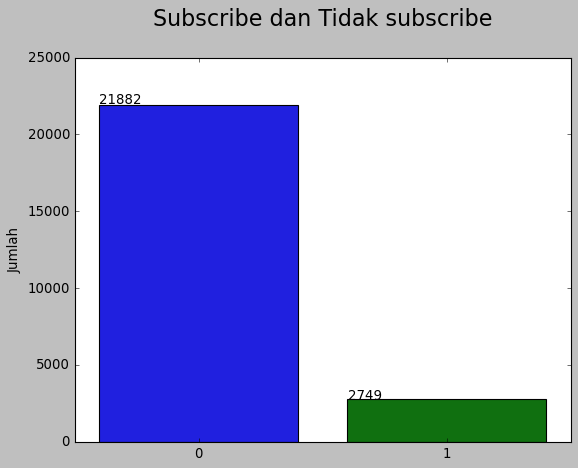

In [8]:
s = sns.countplot(x = "is_subscribed", data = data)
for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.title("Subscribe dan Tidak subscribe\n", fontsize = 20)
    plt.xlabel('')
    plt.ylabel('Jumlah')

### Melihat Korelasi antar variabel

Text(0.5, 1.0, 'Hubungan Setiap Variabel\n')

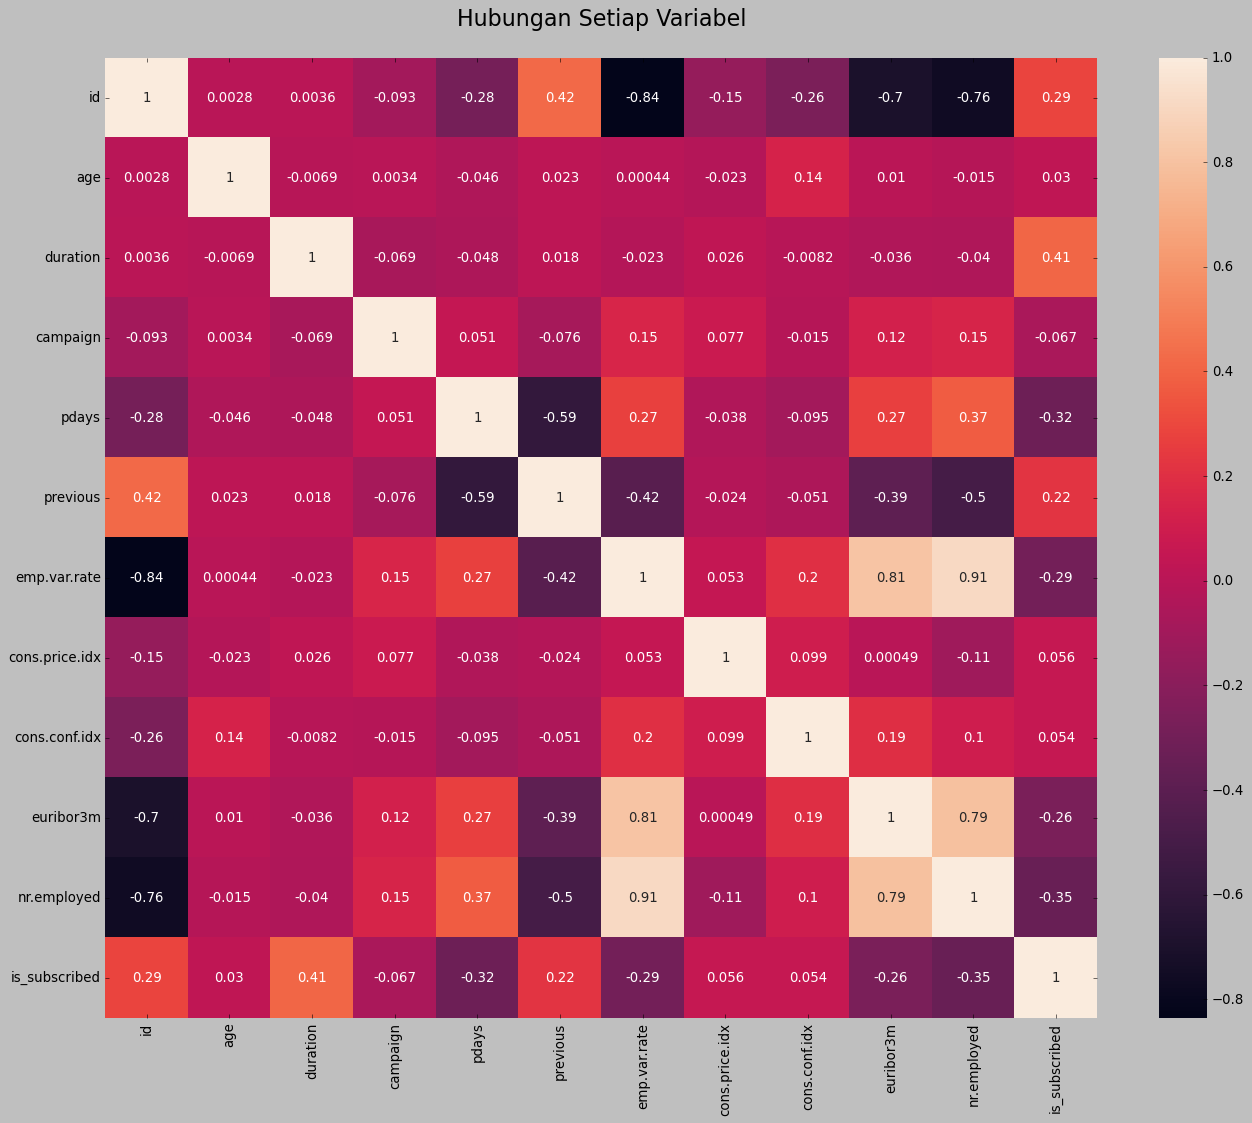

In [9]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.title("Hubungan Setiap Variabel\n", fontsize = 20)

### Profesi apa yang mungkin lebih banyak di survey?

Text(0, 0.5, '')

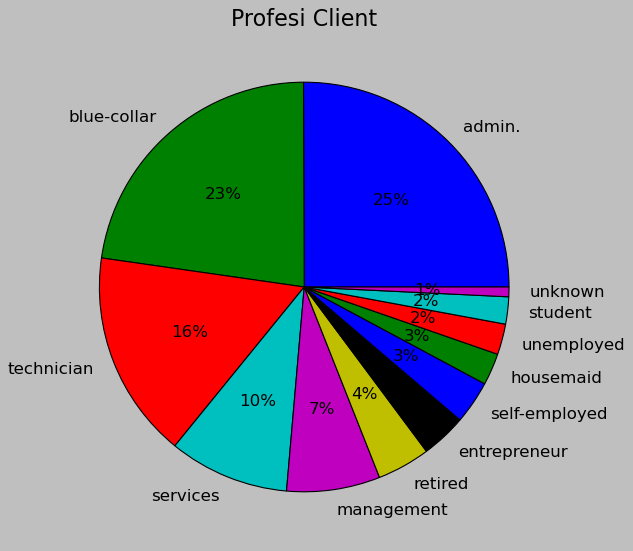

In [10]:
Job = data.groupby(data['job'])['job'].count().sort_values(ascending = False)
plt.figure(figsize=(12,8))
plt.subplot()
Job.plot.pie(autopct = '%1.f%%', fontsize = 15)
plt.title("Profesi Client", fontsize = 20)
plt.ylabel('')

In [11]:
datasub = data.loc[(data.is_subscribed == 1)]
datasub

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed
75,75,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,1
84,84,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,1
175,175,39,housemaid,married,basic.9y,no,yes,no,telephone,may,mon,935,3,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,1
227,227,28,unknown,single,unknown,unknown,yes,yes,telephone,may,tue,1201,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,1
228,228,44,services,married,high.school,no,yes,no,telephone,may,tue,1030,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24622,24622,33,student,married,professional.course,no,yes,no,telephone,nov,thu,112,1,999,0,nonexistent,-1.1,94767.0,-50.8,1031.0,4963.6,1
24623,24623,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,353,1,999,0,nonexistent,-1.1,94767.0,-50.8,1031.0,4963.6,1
24624,24624,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,-1.1,94767.0,-50.8,1031.0,4963.6,1
24625,24625,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94767.0,-50.8,1031.0,4963.6,1


### Pelanggan yang memilih subscribed cenderung memiliki profesi apa?

Text(0, 0.5, '')

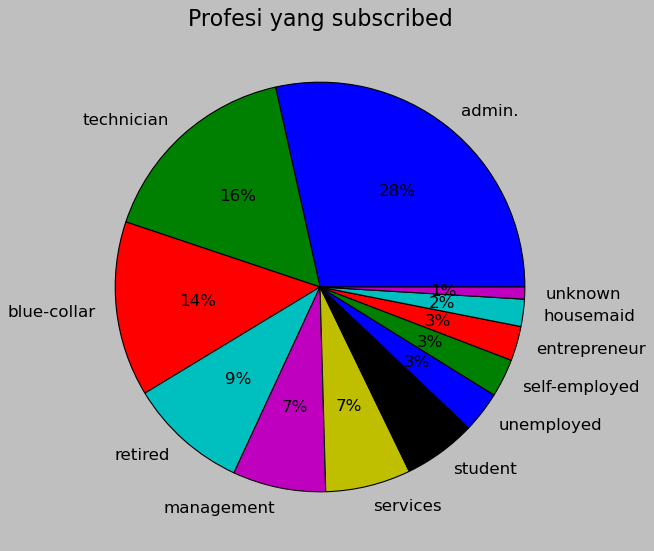

In [12]:
Job_sub = datasub.groupby(datasub['job'])['job'].count().sort_values(ascending = False)
plt.figure(figsize=(12,8))
plt.subplot()
Job_sub.plot.pie(autopct = '%1.f%%', fontsize = 15)
plt.title("Profesi yang subscribed", fontsize = 20)
plt.ylabel('')

### Pelanggan yang memilih subscribed cenderung memiliki status apa?

Text(0, 0.5, '')

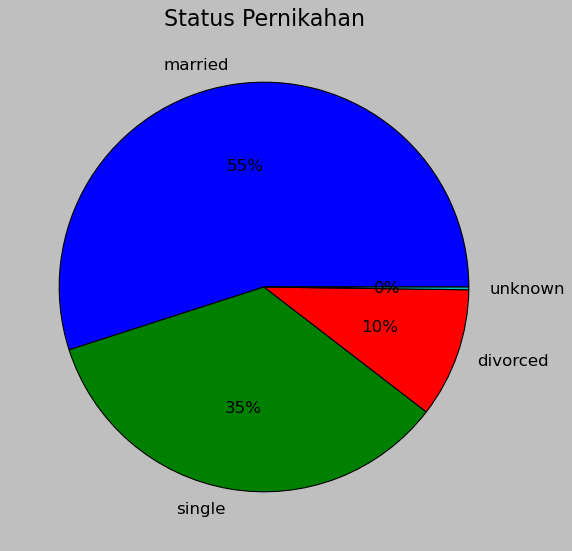

In [13]:
marital_sub = datasub.groupby(datasub['marital'])['marital'].count().sort_values(ascending = False)
plt.figure(figsize=(12,8))
plt.subplot()
marital_sub.plot.pie(autopct = '%1.f%%', fontsize = 15)
plt.title("Status Pernikahan", fontsize = 20)
plt.ylabel('')

### Pelanggan yang memilih subscribed mempunyai kredit default atau tidak?

Text(0, 0.5, '')

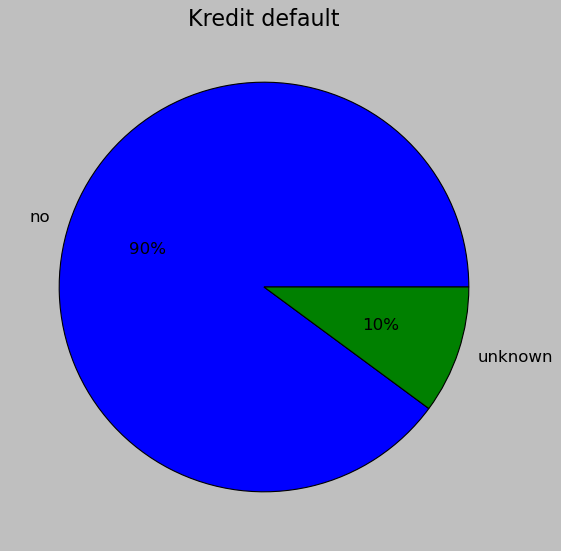

In [14]:
housing_sub = datasub.groupby(datasub['default'])['default'].count().sort_values(ascending = False)
plt.figure(figsize=(12,8))
plt.subplot()
housing_sub.plot.pie(autopct = '%1.f%%', fontsize = 15)
plt.title("Kredit default", fontsize = 20)
plt.ylabel('')

### Pelanggan yang memilih subscribed memiliki beban perumahan atau tidak?

Text(0, 0.5, '')

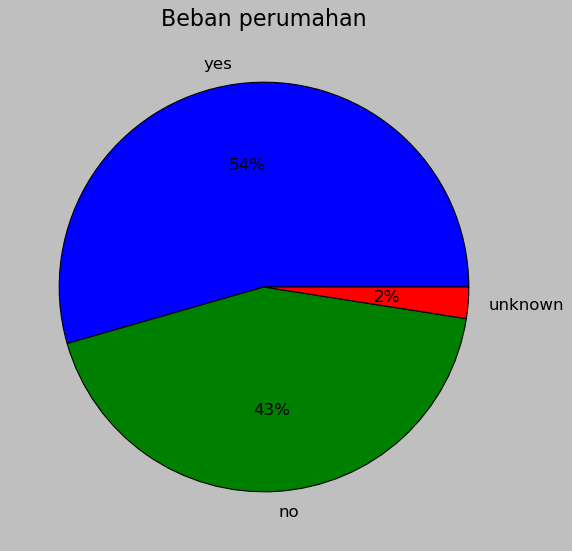

In [15]:
housing_sub = datasub.groupby(datasub['housing'])['housing'].count().sort_values(ascending = False)
plt.figure(figsize=(12,8))
plt.subplot()
housing_sub.plot.pie(autopct = '%1.f%%', fontsize = 15)
plt.title("Beban perumahan", fontsize = 20)
plt.ylabel('')

### Pelanggan yang memilih subscribed memiliki pinjaman atau tidak?

Text(0, 0.5, '')

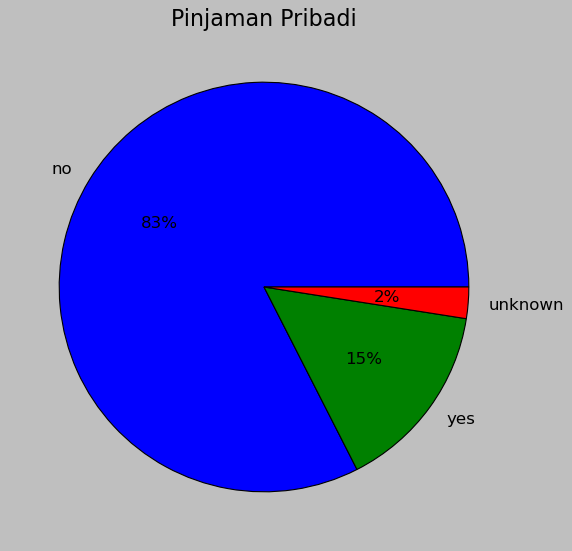

In [16]:
loan_sub = datasub.groupby(datasub['loan'])['loan'].count().sort_values(ascending = False)
plt.figure(figsize=(12,8))
plt.subplot()
loan_sub.plot.pie(autopct = '%1.f%%', fontsize = 15)
plt.title("Pinjaman Pribadi", fontsize = 20)
plt.ylabel('')

### Pelanggan yang memilih subscribed berpendidikan apa?

Text(0, 0.5, '')

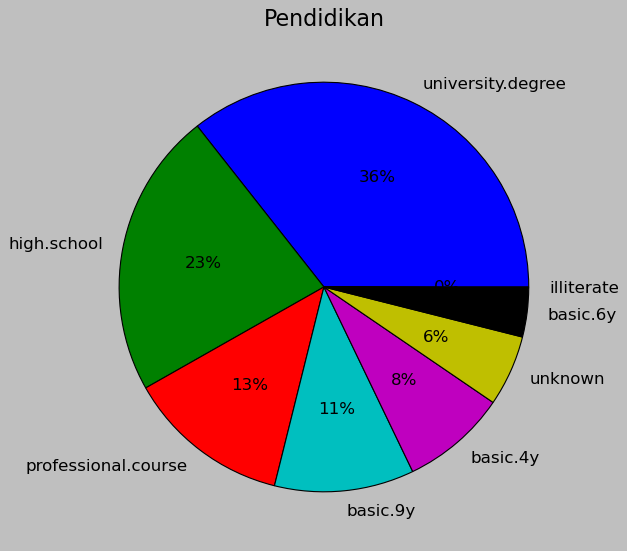

In [17]:
education_sub = datasub.groupby(datasub['education'])['education'].count().sort_values(ascending = False)
plt.figure(figsize=(12,8))
plt.subplot()
education_sub.plot.pie(autopct = '%1.f%%', fontsize = 15)
plt.title("Pendidikan", fontsize = 20)
plt.ylabel('')

In [18]:
bins=[17,30,60,100]
labels =["Young", "Adult", "Senior"]
data['age_group']=pd.cut(data['age'], bins=bins, labels = labels, right = False)
data

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_subscribed,age_group
0,0,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0,Adult
1,1,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0,Adult
2,2,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0,Adult
3,3,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0,Young
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,0,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24626,24626,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,0,Senior
24627,24627,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,0,Adult
24628,24628,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94767.0,-50.8,1028.0,4963.6,0,Young
24629,24629,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,0,Adult


In [19]:
datasub = data.loc[(data.is_subscribed == 1)]


### Umur

Text(0, 0.5, '')

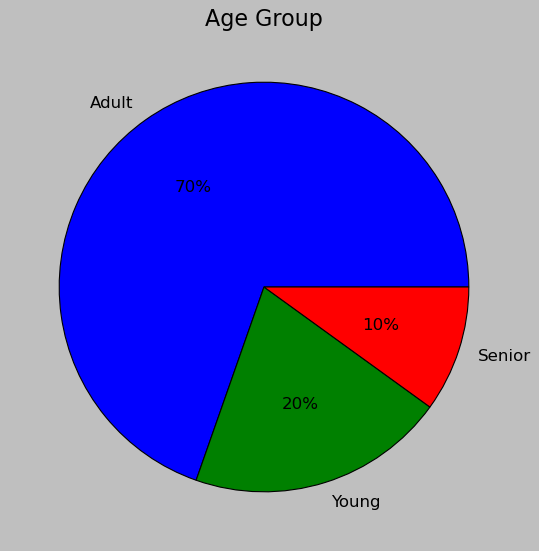

In [20]:
agegroup_sub = datasub.groupby(datasub['age_group'])['age_group'].count().sort_values(ascending = False)
plt.figure(figsize=(12,8))
plt.subplot()
agegroup_sub.plot.pie(autopct = '%1.f%%', fontsize = 15)
plt.title("Age Group", fontsize = 20)
plt.ylabel('')

In [21]:
CT = pd.crosstab(index=data["is_subscribed"], columns=data["age_group"])
CT

age_group,Young,Adult,Senior
is_subscribed,,,
0,2902,18558,422
1,561,1914,274


### Apakah hasil campaign sebelumnya berpengaruh untuk keputusan campaign saat ini?

In [22]:
CT = pd.crosstab(index=data["is_subscribed"], columns=data["poutcome"])
CT

poutcome,failure,nonexistent,success
is_subscribed,,,
0,2171,19410,301
1,342,1888,519
